In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime



In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [17]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [18]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=800ac6692f095a28a3046b68ec8bf132


In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | saint-joseph
Processing Record 3 of Set 1 | fortuna
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | libreville
Processing Record 7 of Set 1 | lagoa
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | samusu
City not found. Skipping...
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | bam
Processing Record 15 of Set 1 | del rio
Processing Record 16 of Set 1 | portland
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 20 of Set 1 | san carlos de bariloche
Processing Record 21 of

Processing Record 39 of Set 4 | kodinsk
Processing Record 40 of Set 4 | sokoto
Processing Record 41 of Set 4 | ndjole
Processing Record 42 of Set 4 | grindavik
Processing Record 43 of Set 4 | kondagaon
Processing Record 44 of Set 4 | navahrudak
Processing Record 45 of Set 4 | lavrentiya
Processing Record 46 of Set 4 | torbay
Processing Record 47 of Set 4 | dortyol
Processing Record 48 of Set 4 | praia da vitoria
Processing Record 49 of Set 4 | usinsk
Processing Record 50 of Set 4 | maragogi
Processing Record 1 of Set 5 | acurenam
Processing Record 2 of Set 5 | weyburn
Processing Record 3 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 5 | xinyu
Processing Record 5 of Set 5 | mbanza-ngungu
Processing Record 6 of Set 5 | nurlat
Processing Record 7 of Set 5 | ilhabela
Processing Record 8 of Set 5 | ostrovnoy
Processing Record 9 of Set 5 | coihueco
Processing Record 10 of Set 5 | san patricio
Processing Record 11 of Set 5 | cacoal
Processing Record 12 of Set 5

Processing Record 34 of Set 8 | calvinia
Processing Record 35 of Set 8 | nelson bay
Processing Record 36 of Set 8 | magadan
Processing Record 37 of Set 8 | kloulklubed
Processing Record 38 of Set 8 | chhagalnaiya
Processing Record 39 of Set 8 | hit
Processing Record 40 of Set 8 | fare
Processing Record 41 of Set 8 | uvinza
Processing Record 42 of Set 8 | road town
Processing Record 43 of Set 8 | olinda
Processing Record 44 of Set 8 | prince rupert
Processing Record 45 of Set 8 | marcona
City not found. Skipping...
Processing Record 46 of Set 8 | umm lajj
Processing Record 47 of Set 8 | troitsko-pechorsk
Processing Record 48 of Set 8 | temaraia
City not found. Skipping...
Processing Record 49 of Set 8 | eenhana
Processing Record 50 of Set 8 | katsuura
Processing Record 1 of Set 9 | vauvert
Processing Record 2 of Set 9 | goulburn
Processing Record 3 of Set 9 | goderich
Processing Record 4 of Set 9 | butterworth
Processing Record 5 of Set 9 | pak phanang
Processing Record 6 of Set 9 | art

Processing Record 23 of Set 12 | mareeba
Processing Record 24 of Set 12 | karratha
Processing Record 25 of Set 12 | ponerihouen
Processing Record 26 of Set 12 | belmonte
Processing Record 27 of Set 12 | oktyabrskiy
Processing Record 28 of Set 12 | maues
Processing Record 29 of Set 12 | dibrugarh
Processing Record 30 of Set 12 | umiray
Processing Record 31 of Set 12 | bolshaya vishera
City not found. Skipping...
Processing Record 32 of Set 12 | almaznyy
Processing Record 33 of Set 12 | tarbert
Processing Record 34 of Set 12 | kolo
Processing Record 35 of Set 12 | pisco
Processing Record 36 of Set 12 | araouane
Processing Record 37 of Set 12 | dawei
Processing Record 38 of Set 12 | tarumovka
Processing Record 39 of Set 12 | ahipara
Processing Record 40 of Set 12 | eyl
Processing Record 41 of Set 12 | lakatoro
Processing Record 42 of Set 12 | saint-francois
Processing Record 43 of Set 12 | fernley
Processing Record 44 of Set 12 | pauini
Processing Record 45 of Set 12 | deniliquin
Processi

In [20]:

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,75.20,88,20,10.29,US,2020-05-28 12:15:48
1,Saint-Joseph,-21.37,55.62,82.40,45,20,6.93,RE,2020-05-28 12:15:48
2,Fortuna,40.60,-124.16,55.00,100,90,3.36,US,2020-05-28 12:15:49
3,Georgetown,5.41,100.34,87.80,79,20,6.93,MY,2020-05-28 12:15:49
4,Libreville,0.39,9.45,86.00,74,40,8.05,GA,2020-05-28 12:15:49
...,...,...,...,...,...,...,...,...,...
562,Pakdasht,35.48,51.68,98.60,8,20,6.93,IR,2020-05-28 12:16:53
563,Esna,25.29,32.55,93.20,30,1,5.82,EG,2020-05-28 12:16:53
564,Oussouye,12.48,-16.55,86.00,78,38,4.70,SN,2020-05-28 12:16:53
565,Swan River,52.11,-101.27,46.98,82,100,13.47,CA,2020-05-28 12:16:53


In [21]:
New_Order_Column=["City", "Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [22]:
city_data_df=city_data_df[New_Order_Column]

In [23]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2020-05-28 12:15:48,22.08,-159.32,75.20,88,20,10.29
1,Saint-Joseph,RE,2020-05-28 12:15:48,-21.37,55.62,82.40,45,20,6.93
2,Fortuna,US,2020-05-28 12:15:49,40.60,-124.16,55.00,100,90,3.36
3,Georgetown,MY,2020-05-28 12:15:49,5.41,100.34,87.80,79,20,6.93
4,Libreville,GA,2020-05-28 12:15:49,0.39,9.45,86.00,74,40,8.05
...,...,...,...,...,...,...,...,...,...
562,Pakdasht,IR,2020-05-28 12:16:53,35.48,51.68,98.60,8,20,6.93
563,Esna,EG,2020-05-28 12:16:53,25.29,32.55,93.20,30,1,5.82
564,Oussouye,SN,2020-05-28 12:16:53,12.48,-16.55,86.00,78,38,4.70
565,Swan River,CA,2020-05-28 12:16:53,52.11,-101.27,46.98,82,100,13.47


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
import time

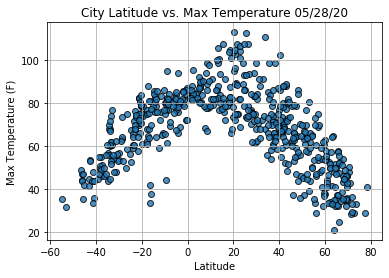

In [27]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

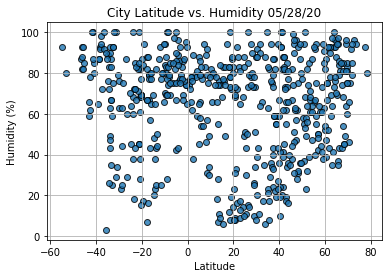

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

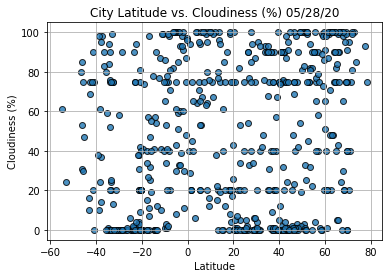

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

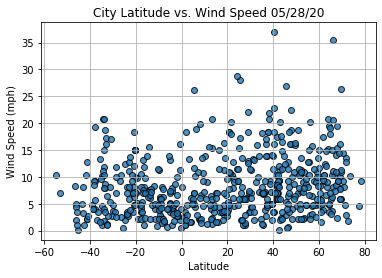

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [32]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [33]:
index13 = city_data_df.loc[13]
index13

City                     Portland
Country                        US
Date          2020-05-28 12:15:50
Lat                         45.52
Lng                       -122.68
Max Temp                    62.01
Humidity                       67
Cloudiness                     20
Wind Speed                   2.91
Name: 13, dtype: object

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2020-05-28 12:15:48,22.08,-159.32,75.20,88,20,10.29
2,Fortuna,US,2020-05-28 12:15:49,40.60,-124.16,55.00,100,90,3.36
3,Georgetown,MY,2020-05-28 12:15:49,5.41,100.34,87.80,79,20,6.93
4,Libreville,GA,2020-05-28 12:15:49,0.39,9.45,86.00,74,40,8.05
5,Lagoa,PT,2020-05-28 12:15:49,39.05,-27.98,58.80,59,67,7.16
...,...,...,...,...,...,...,...,...,...
562,Pakdasht,IR,2020-05-28 12:16:53,35.48,51.68,98.60,8,20,6.93
563,Esna,EG,2020-05-28 12:16:53,25.29,32.55,93.20,30,1,5.82
564,Oussouye,SN,2020-05-28 12:16:53,12.48,-16.55,86.00,78,38,4.70
565,Swan River,CA,2020-05-28 12:16:53,52.11,-101.27,46.98,82,100,13.47


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

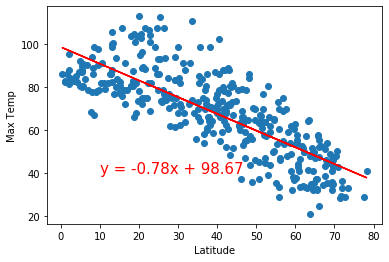

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

In [37]:
linregress(x_values, y_values)

LinregressResult(slope=-0.7757854385256451, intercept=98.67358025000155, rvalue=-0.7931086738040419, pvalue=6.778970477724386e-82, stderr=0.03093117490114377)

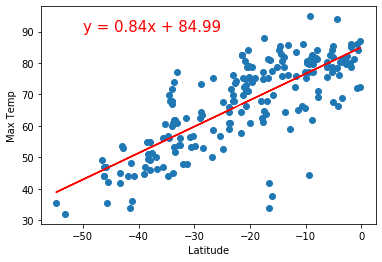

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

In [39]:
linregress(x_values, y_values)

LinregressResult(slope=0.8415521431404392, intercept=84.99431178863838, rvalue=0.7738749092362394, pvalue=6.0765057014936395e-40, stderr=0.04970447859928017)

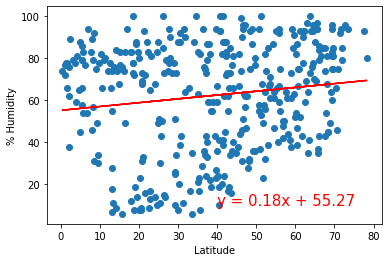

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemispher for % Humidity', '% Humidity',(40,10))

In [41]:
linregress(x_values, y_values)

LinregressResult(slope=0.18150495321461324, intercept=55.27314123128386, rvalue=0.1420021820304489, pvalue=0.006009776571160114, stderr=0.06568755048481896)

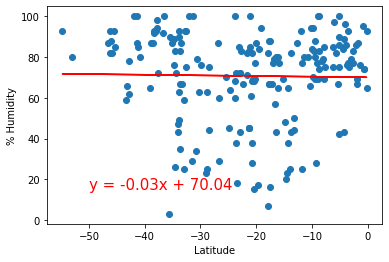

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

In [43]:
linregress(x_values, y_values)

LinregressResult(slope=-0.031641979101362586, intercept=70.04034326565127, rvalue=-0.018794190696268746, pvalue=0.7947835062088933, stderr=0.12148220922851886)

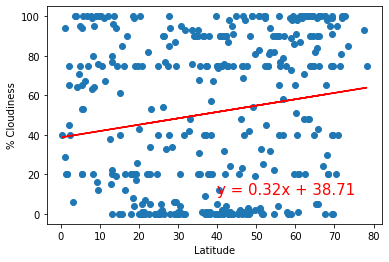

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemispher for % Cloudiness', '% Cloudiness',(40,10))

In [45]:
linregress(x_values, y_values)

LinregressResult(slope=0.32174378849429963, intercept=38.70718757784232, rvalue=0.1680715084909808, pvalue=0.0011207667264028557, stderr=0.09797309615650315)

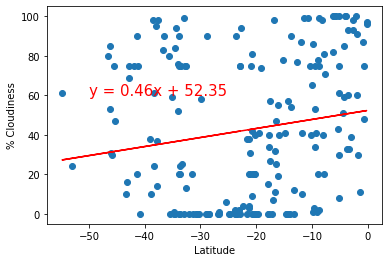

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

In [47]:
linregress(x_values, y_values)

LinregressResult(slope=0.4567606421198808, intercept=52.35321690690759, rvalue=0.16775324916569218, pvalue=0.01938592403786911, stderr=0.19371743776435427)

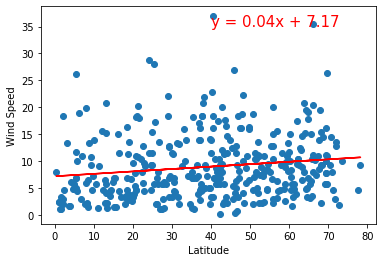

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

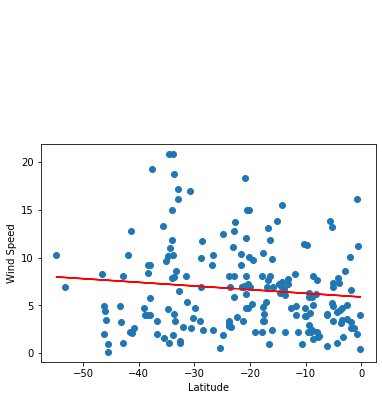

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))